In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
# @Date    : Feb-11-21 18:25
# @Author  : Kelly Hwong (dianhuangkan@gmail.com)

import os
import numpy as np
from datetime import datetime
import tensorflow as tf
import matplotlib.pyplot as plt
from xor_gate_nn.models.keras_fn.mlp import MLP
from xor_gate_nn.datasets.keras_fn.datasets import XOR_Dataset
from mlp_train import reset_weights

In [2]:
model_name = "MLP"
date_time = datetime.now().strftime('%Y-%m-%d %H-%M')
prefix = os.path.join("~", "Documents", "DeepLearningData", "xor")
subfix = os.path.join(model_name, date_time)
log_dir = os.path.expanduser(os.path.join(prefix, subfix, "logs"))
ckpt_dir = os.path.expanduser(os.path.join(prefix, subfix, "ckpts"))
os.makedirs(log_dir, exist_ok=True)
os.makedirs(ckpt_dir, exist_ok=True)

### Dataset

In [3]:
dataset = XOR_Dataset(batch_size=4) # Full batch learning
for X, y in dataset:
    print(X, y)
    print(X.shape, y.shape)  # (1, 2) and (1,)

[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]] [0. 1. 1. 0.]
(4, 2) (4,)


### MLP model

In [4]:
# units=3
# bias_initializer="glorot_uniform"
# bias_initializer="zeros"
# bias_initializer="ones"
mlp = MLP(input_shape=(2, ), units=2, bias_initializer="glorot_uniform", num_classes=1)

#### Initial weights

In [6]:
reset_weights(mlp)
layer = mlp.get_layer("dense_1")
print(layer.weights[0].numpy())
print(layer.weights[1].numpy())
layer = mlp.get_layer("dense_2")
print(layer.weights[0].numpy())
print(layer.weights[1].numpy())

[[ 0.2523402 -0.8353323]
 [ 1.1844045 -0.9844206]]
[0.03293693 0.4663633 ]
[[-0.05893421  1.1871041 ]
 [ 0.7065594   0.55009866]]
[-0.80490077  1.1120554 ]


#### Layer initializer

In [7]:
layer = mlp.get_layer("dense_1")
print(layer.kernel_initializer)
print(layer.bias_initializer)

In [8]:
def get_output_map(model, N=5):
    x = np.linspace(0, 1, N)
    y = np.linspace(0, 1, N)
    output_map = []
    for _x in x:
        for _y in y:
            o = model(np.array([[_x, _y]])).numpy()[0][0]
            output_map.append(o)
    output_map = np.asarray(output_map).reshape((N, N))

    return output_map

In [9]:
output_map = get_output_map(mlp, N=5)
print(output_map)

[[0.7411969  0.7944915  0.8391924  0.87569153 0.9048456 ]
 [0.77129686 0.8198992  0.86004704 0.8924195  0.9180176 ]
 [0.7988461  0.84278715 0.87858844 0.9071351  0.92950845]
 [0.8238348  0.8632517  0.89497334 0.9200183  0.9394948 ]
 [0.8463164  0.881427   0.9093752  0.9312496  0.94814533]]


In [10]:
%%time
reset_weights(mlp)
mlp.compile(loss=tf.keras.losses.MeanAbsoluteError(), optimizer=tf.keras.optimizers.SGD(learning_rate=0.1))
# mlp.compile(loss=tf.keras.losses.MeanAbsoluteError(), optimizer=tf.keras.optimizers.Adam(learning_rate=1e-7)) # 1e-4
epochs = 100
history = mlp.fit(dataset, epochs=epochs, verbose=1)
# epochs=100 Wall time: 4.01 s
# epochs=10000 Wall time: 6min 15s (375 s)

===========================] - 0s 3ms/step - loss: 0.4989
Epoch 88/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.4988
Epoch 89/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.4987
Epoch 90/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4987
Epoch 91/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4986
Epoch 92/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.4986
Epoch 93/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4985
Epoch 94/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4985
Epoch 95/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.4984
Epoch 96/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.4983
Epoch 97/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4983
Epoch 98/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.4982
Epoch 99/10000
1/1 [==============================]

KeyboardInterrupt: 

#### #### Final trained weights

In [12]:
layer = mlp.get_layer("dense_1")
print(layer.weights[0].numpy())
print(layer.weights[1].numpy())
layer = mlp.get_layer("dense_2")
print(layer.weights[0].numpy())
print(layer.weights[1].numpy())

[[-0.40305233  0.9396852 ]
 [ 0.46914434  0.10540915]]
[1. 1.]
[[ 0.39070916 -0.03545868]
 [ 1.1433996   0.0961808 ]]
[1. 1.]


In [13]:
loss = history.history["loss"]

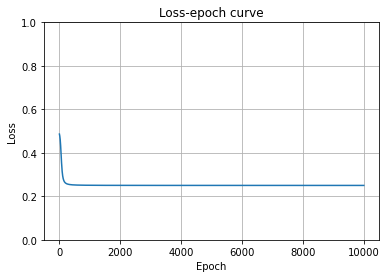

In [14]:
plt.plot(np.arange(1, epochs+1), loss)
plt.title("Loss-epoch curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.ylim(0, 1)
plt.grid()
plt.savefig(os.path.join(log_dir, "loss.jpg"))

In [15]:
output_map = get_output_map(mlp, N=20)
# print(output_map)

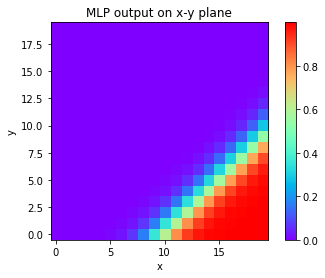

In [16]:
plt.imshow(output_map, origin="lower", cmap="rainbow")
plt.colorbar()
plt.title("MLP output on x-y plane")
plt.xlabel("x")
plt.ylabel("y")
plt.savefig(os.path.join(log_dir, "output_map.jpg"))